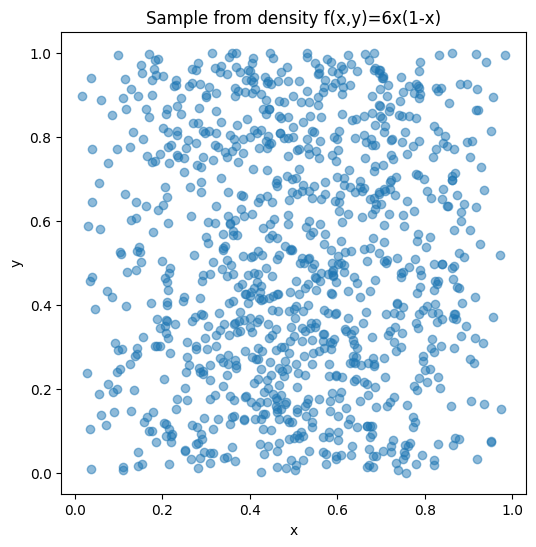

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Number of observations
N = 3_000_000

# Generate x-values from Beta(2,2), which has density 6*x*(1-x)
x_samples = np.random.beta(2, 2, size=N)

# Generate y-values uniformly on [0,1]
y_samples = np.random.rand(N)

# Combine x and y into one array (each row is an observation)
data = np.column_stack((x_samples, y_samples))

# Optional: Plot a sample of the observations (using first 1000 points for clarity)
plt.figure(figsize=(6,6))
plt.scatter(x_samples[:1000], y_samples[:1000], alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample from density f(x,y)=6x(1-x)')
plt.show()



In [25]:
# Initialize x_star and y_star
x_star_1 = 0.23
y_star_1 = 0.06

# Define the target mean value
target_mean_1 = 0.8

# Define a tolerance for convergence
tolerance_1 = 1e-10

# Define a maximum number of iterations to prevent infinite loops
max_iterations_1 = 1000

# Function to update x_star and y_star
def update_stars(x_star, y_star, meanX_in_A, meanY_in_B, learning_rate=0.05):
    x_star += learning_rate * (target_mean_1 - meanX_in_A)
    y_star += learning_rate * (target_mean_1 - meanY_in_B)
    return x_star, y_star

# Iteratively update x_star and y_star until convergence
for iteration_1 in range(max_iterations_1):
    # Update slope_D based on current x_star and y_star
    slope_D_1 = (target_mean_1 - y_star_1) / (target_mean_1 - x_star_1)
    
    def yD_of_x(x):
        return y_star_1 + slope_D_1 * (x - x_star_1)
    
    def xD_of_y(y):
        return x_star_1 + (1./slope_D_1) * (y - y_star_1)
    
    # Define region B
    left_mask_B_1  = (x_samples <= x_star_1) & (y_samples >= y_star_1)
    right_mask_B_1 = (x_samples >= x_star_1) & (y_samples >= yD_of_x(x_samples))
    B_mask_1 = left_mask_B_1 | right_mask_B_1
    
    # Define region A
    down_mask_A_1  = (y_samples <= y_star_1) & (x_samples >= x_star_1)
    up_mask_A_1    = (y_samples >= y_star_1) & (x_samples >= xD_of_y(y_samples))
    A_mask_1 = down_mask_A_1 | up_mask_A_1
    
    # Estimate E[Y | B]
    Y_in_B_1 = y_samples[B_mask_1]
    meanY_in_B_1 = np.mean(Y_in_B_1) if len(Y_in_B_1) > 0 else float('nan')
    
    # Estimate E[X | A]
    X_in_A_1 = x_samples[A_mask_1]
    meanX_in_A_1 = np.mean(X_in_A_1) if len(X_in_A_1) > 0 else float('nan')
    
    # Check for convergence
    if abs(meanY_in_B_1 - target_mean_1) < tolerance_1 and abs(meanX_in_A_1 - target_mean_1) < tolerance_1:
        break
    
    # Update x_star and y_star
    x_star_1, y_star_1 = update_stars(x_star_1, y_star_1, meanX_in_A_1, meanY_in_B_1)

print("ITERATIONS ON 6x^2y")
print("")
print("Converged after", iteration_1 + 1, "iterations")
print("Share of X in A =", len(X_in_A_1)/N)
print("Share of Y in B =", len(Y_in_B_1)/N)
print("Total share covered = ", (len(X_in_A_1) + len(Y_in_B_1))/N)
print("x* =", x_star_1)
print("y* =", y_star_1)
print("E(x) in A =", meanX_in_A_1)
print("E(y) in B =", meanY_in_B_1)

ITERATIONS ON 6x^2y

Converged after 1000 iterations
Share of X in A = 0.19887566666666667
Share of Y in B = 0.369735
Total share covered =  0.5686106666666667
x* = 0.6687632971974925
y* = 0.5806446554409722
E(x) in A = 0.800000066269036
E(y) in B = 0.7999998506942743


In [26]:
print("ratio of measures ", (len(X_in_A_1)/N)/(len(Y_in_B_1)/N))

ratio of measures  0.5378870452260854


In [32]:
#now pick x*=y*, split the set the same way and check the ratio of measures

x_star_2 = 0.99
y_star_2 = 0.99


slope_D_2 = 1
def yD_of_x(x):
        return y_star_2 + slope_D_2 * (x - x_star_2)
    
def xD_of_y(y):
    return x_star_2 + (1./slope_D_2) * (y - y_star_2)
    
# Define region B
left_mask_B_2  = (x_samples <= x_star_2) & (y_samples >= y_star_2)
right_mask_B_2 = (x_samples >= x_star_2) & (y_samples >= yD_of_x(x_samples))
B_mask_2 = left_mask_B_2 | right_mask_B_2
    
# Define region A
down_mask_A_2  = (y_samples <= y_star_2) & (x_samples >= x_star_2)
up_mask_A_2    = (y_samples >= y_star_2) & (x_samples >= xD_of_y(y_samples))
A_mask_2 = down_mask_A_2 | up_mask_A_2
    
# Estimate E[Y | B]
Y_in_B_2 = y_samples[B_mask_2]
meanY_in_B_2 = np.mean(Y_in_B_2) if len(Y_in_B_2) > 0 else float('nan')
    
# Estimate E[X | A]
X_in_A_2 = x_samples[A_mask_2]
meanX_in_A_2 = np.mean(X_in_A_2) if len(X_in_A_2) > 0 else float('nan')



print("Share of X in A =", len(X_in_A_2)/N)
print("Share of Y in B =", len(Y_in_B_2)/N)
print("Total share covered = ", (len(X_in_A_2) + len(Y_in_B_2))/N)
print("x* =", x_star_2)
print("y* =", y_star_2)
print("E(x) in A =", meanX_in_A_2)
print("E(y) in B =", meanY_in_B_2)

print("ratio of measures ", (len(X_in_A_2)/N)/(len(Y_in_B_2)/N))


Share of X in A = 0.000303
Share of Y in B = 0.009932666666666666
Total share covered =  0.010235666666666667
x* = 0.99
y* = 0.99
E(x) in A = 0.9933783160951511
E(y) in B = 0.9950137649076202
ratio of measures  0.030505403047184375
